In [35]:
%load_ext autoreload
%autoreload 2
import numpy as np
from astropy import units as u
from astropy import constants as const
from matplotlib import pyplot as plt

from cluster_measurements import ClusterMeasurements
import iqbal_agn_heating_functions as iq

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# pick values to match figure 1 top left
M500 = 2*10**14*u.Msun/1.25 # Mvir=M500*1.25
R500=1*u.Mpc
z=0

measurements=ClusterMeasurements(R500, M500, z)

Linj=7*10**44 * u.erg/u.s

In [12]:
x_vals=np.logspace(-2, 1)
rs=x_vals*R500

In [32]:
heating_03 = iq.vol_heating_rate(rs, measurements, Linj, 0.3*measurements.R500)
heating_01 = iq.vol_heating_rate(rs, measurements, Linj, 0.1*measurements.R500)

In [33]:
heating_03

<Quantity [-1.12204394e-24, -8.10347684e-25, -5.82789341e-25,
           -4.17200084e-25, -2.97154486e-25, -2.10495955e-25,
           -1.48239127e-25, -1.03753135e-25, -7.21541982e-26,
           -4.98541016e-26, -3.42247183e-26, -2.33488161e-26,
           -1.58349250e-26, -1.06796812e-26, -7.16530016e-27,
           -4.78305457e-27, -3.17607600e-27, -2.09664210e-27,
           -1.37446008e-27, -8.93386605e-28, -5.74633599e-28,
           -3.64900986e-28, -2.28159896e-28, -1.40054480e-28,
           -8.41247445e-29, -4.92662180e-29, -2.80184996e-29,
           -1.54066648e-29, -8.15165125e-30, -4.12804294e-30,
           -1.98905374e-30, -9.05964284e-31, -3.87228532e-31,
           -1.54049274e-31, -5.65170555e-32, -1.89227756e-32,
           -5.71352590e-33, -1.53470687e-33, -3.61049155e-34,
           -7.30678374e-35, -1.24599423e-35, -1.74809141e-36,
           -1.96288812e-37, -1.70875463e-38, -1.11158495e-39,
           -5.17890534e-41, -1.64539503e-42, -3.36870512e-44,
        

In [75]:
n_e = np.sqrt(0.704)*(iq.rho_g(rs, measurements)/const.m_p).to(u.Mpc**-3)
temp = iq.T_g(rs.value, measurements)
cooling = iq.vol_cooling_rate(n_e, temp)

200000000000000.0 solMass 0
101.14287921960845
200000000000000.0 solMass 0
101.14287921960845
200000000000000.0 solMass 0
101.14287921960845
200000000000000.0 solMass 0
101.14287921960845


200000000000000.0 solMass 0
101.14287921960845
200000000000000.0 solMass 0
101.14287921960845
200000000000000.0 solMass 0
101.14287921960845
200000000000000.0 solMass 0
101.14287921960845


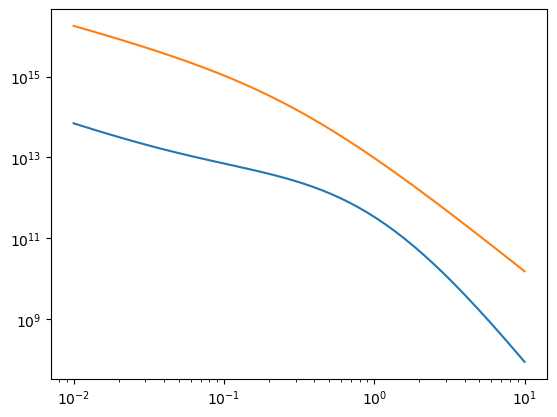

In [73]:
plt.loglog(rs, iq.rho_g(rs, measurements))
plt.loglog(rs, iq.rho_nfw(rs, measurements))
#iq.T_g(rs.value, measurements)

200000000000000.0 solMass 0
101.14287921960845
200000000000000.0 solMass 0
101.14287921960845


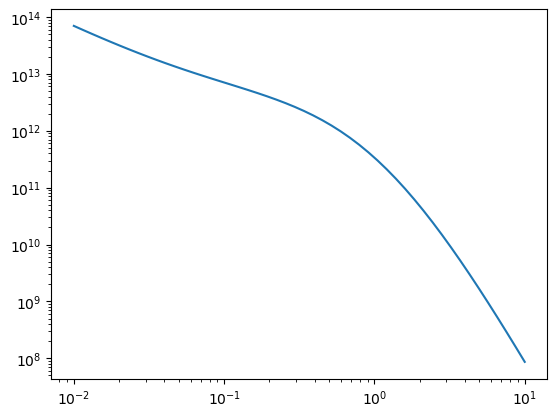

In [72]:
plt.loglog(rs, iq.rho_g(rs, measurements))

200000000000000.0 solMass 0
101.14287921960845
200000000000000.0 solMass 0
101.14287921960845


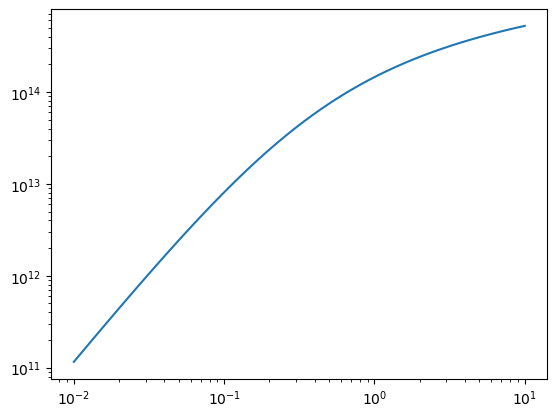

In [74]:
plt.loglog(rs, iq.M_enc(rs, measurements))

In [71]:
iq.virial_radius(M500/1.25, measurements.z)

128000000000000.0 solMass 0
101.14287921960845
1.2222436570290664e+32 solMass / Mpc3


<Quantity 1.30483787 Mpc>

In [66]:
from astropy.cosmology import FlatLambdaCDM
cosmo=FlatLambdaCDM(70,0.3)
cosmo.critical_density(z).to(u.Msun/u.Mpc**3)

<Quantity 1.22224366e+32 solMass / Mpc3>

In [70]:
(3*cosmo.H0**2/(8*np.pi*const.G)).to(u.Msun/u.Mpc**3)
#cosmo.critical_density(z).to(u.Msun/u.Mpc**3)

<Quantity 1.35992947e+11 solMass / Mpc3>

In [54]:
iq.overdensity(z)


101.14287921960845

In [47]:
(n_e**2*iq.cooling_function(temp)).to(u.erg/u.s * u.cm**-3)

<Quantity [1.05417301e-35, 1.19114069e-35, 1.34870803e-35, 1.53044408e-35,
           1.74055285e-35, 1.98394950e-35, 2.26631782e-35, 2.59412661e-35,
           2.97457262e-35, 3.41540143e-35, 3.92454142e-35, 4.50946696e-35,
           5.17619357e-35, 5.92780771e-35, 6.76246235e-35, 7.67084754e-35,
           8.63329452e-35, 9.61690484e-35, 1.05734108e-34, 1.14387962e-34,
           1.21359173e-34, 1.25812416e-34, 1.26961498e-34, 1.24218890e-34,
           1.17354243e-34, 1.06617244e-34, 9.27745652e-35, 7.70258437e-35,
           6.08006942e-35, 4.54859366e-35, 3.21657523e-35, 2.14570316e-35,
           1.34836816e-35, 7.97676211e-36, 4.44284395e-36, 2.33164891e-36,
           1.15472687e-36, 5.40779059e-37, 2.40115237e-37, 1.01389482e-37,
           4.08493520e-38, 1.57589659e-38, 5.84244054e-39, 2.08912327e-39,
           7.23087132e-40, 2.43096303e-40, 7.96463592e-41, 2.55103657e-41,
           8.01150535e-42, 2.47379415e-42] erg / (cm3 s)>

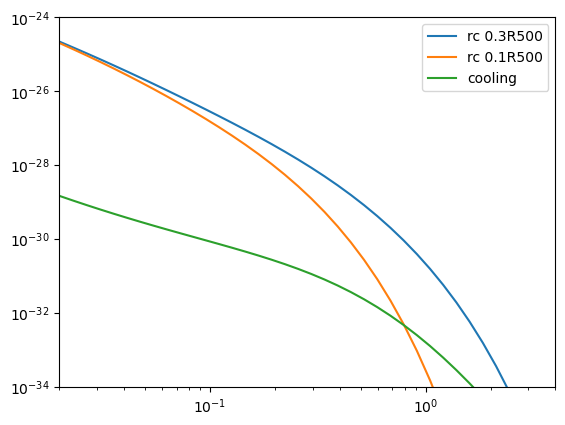

In [76]:
plt.loglog(x_vals, -1*heating_03, label="rc 0.3R500")
plt.loglog(x_vals, -1*heating_01, label="rc 0.1R500")
plt.loglog(x_vals, cooling, label="cooling")
plt.xlim(2*1e-2, 4*1e0)
plt.ylim(1e-34, 1e-24)
plt.legend()

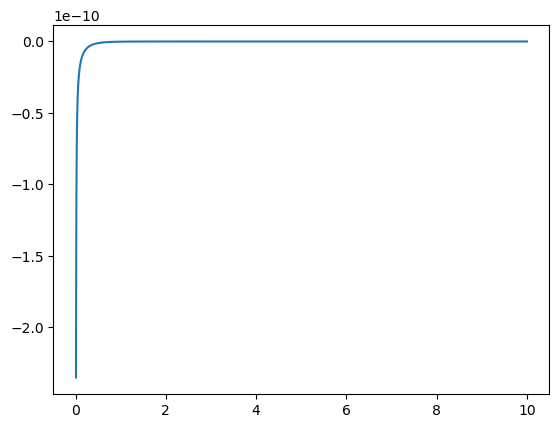

In [21]:
plt.plot(rs, iq.dP_dr(rs, measurements))

In [25]:
q= iq.q(measurements,0.015*measurements.R500,  0.3*measurements.R500)
iq.h(Linj, rs, 0.015*measurements.R500, 0.3*measurements.R500, q)

<Quantity [5.84262302e+50, 4.82916691e+50, 3.96573005e+50, 3.23350484e+50,
           2.61597655e+50, 2.09856555e+50, 1.66831920e+50, 1.31365281e+50,
           1.02414044e+50, 7.90355710e+49, 6.03762014e+49, 4.56647709e+49,
           3.42098298e+49, 2.53992748e+49, 1.87007987e+49, 1.36615117e+49,
           9.90542597e+48, 7.12817115e+48, 5.08914452e+48, 3.60198995e+48,
           2.52461661e+48, 1.74984956e+48, 1.19739685e+48, 8.07362293e+47,
           5.35207980e+47, 3.47923584e+47, 2.21139625e+47, 1.36958896e+47,
           8.23285254e+46, 4.78172081e+46, 2.66951349e+46, 1.42394159e+46,
           7.20723346e+45, 3.43409280e+45, 1.52633877e+45, 6.26199165e+44,
           2.34278020e+44, 7.88217128e+43, 2.34679637e+43, 6.06992568e+42,
           1.33510751e+42, 2.43679805e+41, 3.58777970e+40, 4.12486919e+39,
           3.56705337e+38, 2.22227966e+37, 9.49111470e+35, 2.62446478e+34,
           4.39933060e+32, 4.14423899e+30] cm(3/4) erg(3/4) / (Mpc2 s)>